In [43]:
#for comparing the full-depth and single-depth goods classifications

%pylab inline
from astropy.io import fits as pyfits
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits
from astropy.table import Table,Column
import scipy.stats.distributions as dist

import os
import warnings
import requests

from PIL import Image
import urllib, cStringIO

mpl.rcParams['text.usetex']=True
mpl.rcParams['axes.linewidth'] = 3

warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=UserWarning, append=True);



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [48]:
gdata=Table.read('/data/lucifer1.1/users/galloway/GZHUBBLE/goods_depths_analysis/goods_shallow_1_full_2.fits')

In [8]:
#_1 refers to shallow depth and _2 refers to full depth:
print 'shallow: column _1 = %s, full: column_2 = %s' %(gdata['IMAGING_1'][0],gdata['IMAGING_2'][0])

shallow: column _1 = GOODS-N   , full: column_2 = GOODS_FULL


In [27]:
p_features_shallow_weighted='t01_smooth_or_features_a02_features_or_disk_weighted_fraction_1'
p_features_full_weighted='t01_smooth_or_features_a02_features_or_disk_weighted_fraction_2'
p_features_shallow_debiased='t01_smooth_or_features_a02_features_or_disk_debiased_fraction_1'
p_features_full_debiased='t01_smooth_or_features_a02_features_or_disk_debiased_fraction_2'
p_features_shallow_best='t01_smooth_or_features_a02_features_or_disk_best_fraction_1'
p_features_full_best='t01_smooth_or_features_a02_features_or_disk_best_fraction_2'

## First glance - histograms of weighted, debiased, and best p_features for shallow and full depth

In [12]:
features_weighted_hist,xedges,yedges=np.histogram2d(gdata[p_features_shallow_weighted],gdata[p_features_full_weighted],range=((0,1),(0,1)))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]


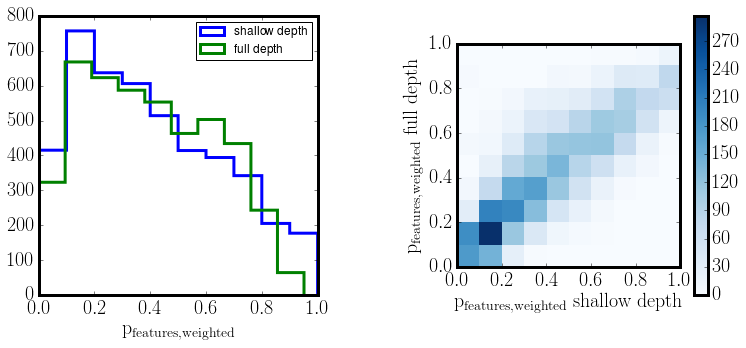

In [13]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 

f=plt.figure(figsize=(20,5))
cmap=cm.Blues
gs=gridspec.GridSpec(1,3)
gs.update(wspace=.5)
ax1 = plt.subplot(gs[0,0])
plt.hist(gdata[p_features_shallow_weighted],histtype='step',label='shallow depth',lw=3)
plt.hist(gdata[p_features_full_weighted],histtype='step',label='full depth',lw=3)
plt.xlabel('$\mathrm{p_{features,weighted}}$',fontsize=20)
plt.legend()

ax2 = plt.subplot(gs[0,1])
plt.imshow(features_weighted_hist.T,origin='lower',extent=extent,interpolation='nearest',cmap=cmap)
plt.xlabel('$\mathrm{p_{features,weighted}~shallow~depth}$',fontsize=20)
plt.ylabel(r'$\mathrm{p_{features,weighted}~full~depth}$',fontsize=20)
plt.colorbar()


In [33]:
correctable = (gdata['Correctable_Category_1']=='correctable        ') & (gdata['Correctable_Category_2']=='correctable        ')



features_debiased_hist,xedges,yedges=np.histogram2d(gdata[correctable][p_features_shallow_debiased],gdata[correctable][p_features_full_debiased],range=((0,1),(0,1)))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]


In [41]:
len(gdata[(gdata['Correctable_Category_2']=='correctable        ') & (gdata['Correctable_Category_1']=='correctable        ') ])

652

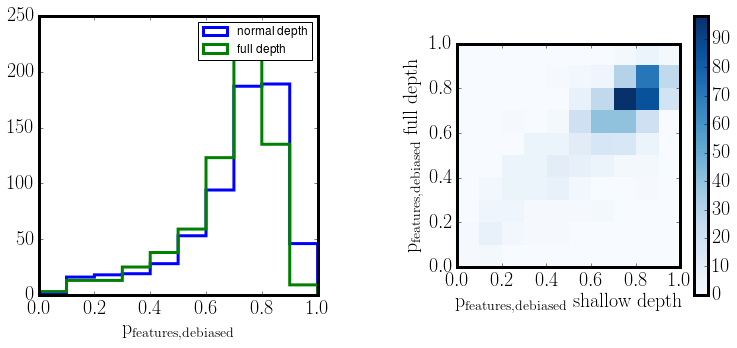

In [36]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 

f=plt.figure(figsize=(20,5))
cmap=cm.Blues
gs=gridspec.GridSpec(1,3)
gs.update(wspace=.5)
ax1 = plt.subplot(gs[0,0])
plt.hist(gdata[correctable][p_features_shallow_debiased],histtype='step',label='normal depth',lw=3,range=(0,1))
plt.hist(gdata[correctable][p_features_full_debiased],histtype='step',label='full depth',lw=3,range=(0,1))
plt.xlabel('$\mathrm{p_{features,debiased}}$',fontsize=20)
plt.legend()

ax2 = plt.subplot(gs[0,1])
plt.imshow(features_debiased_hist.T,origin='lower',extent=extent,interpolation='nearest',cmap=cmap)
plt.xlabel('$\mathrm{p_{features,debiased}~shallow~depth}$',fontsize=20)
plt.ylabel(r'$\mathrm{p_{features,debiased}~full~depth}$',fontsize=20)
plt.colorbar()

In [44]:
features_best_hist,xedges,yedges=np.histogram2d(gdata[p_features_norm_best],gdata[p_features_full_best],range=((0,1),(0,1)))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]


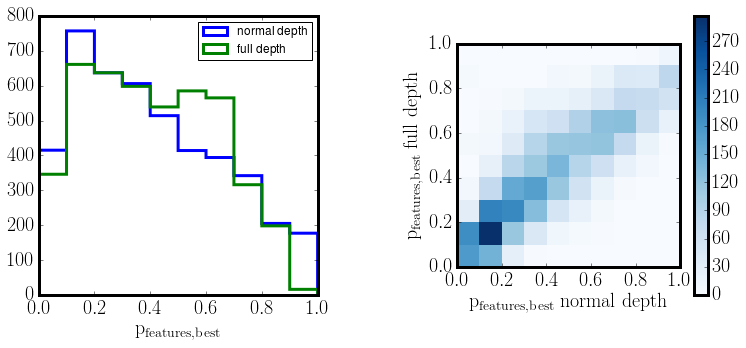

In [45]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 

f=plt.figure(figsize=(20,5))
cmap=cm.Blues
gs=gridspec.GridSpec(1,3)
gs.update(wspace=.5)
ax1 = plt.subplot(gs[0,0])
plt.hist(gdata[p_features_norm_best],histtype='step',label='normal depth',lw=3,range=(0,1))
plt.hist(gdata[p_features_full_best],histtype='step',label='full depth',lw=3,range=(0,1))
plt.xlabel('$\mathrm{p_{features,best}}$',fontsize=20)
plt.legend()

ax2 = plt.subplot(gs[0,1])
plt.imshow(features_best_hist.T,origin='lower',extent=extent,interpolation='nearest',cmap=cmap)
plt.xlabel('$\mathrm{p_{features,best}~normal~depth}$',fontsize=20)
plt.ylabel(r'$\mathrm{p_{features,best}~full~depth}$',fontsize=20)
plt.colorbar()

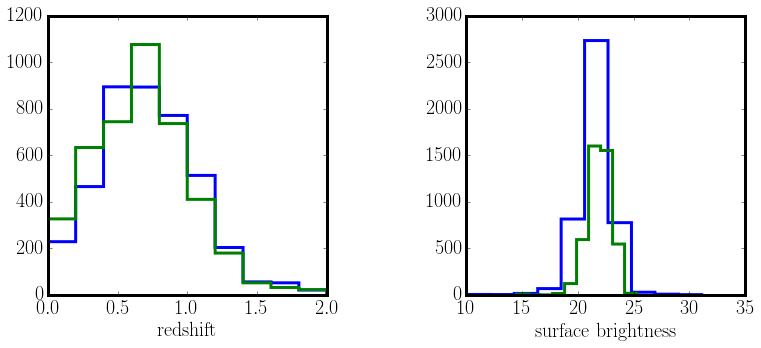

In [42]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 

f=plt.figure(figsize=(20,5))
cmap=cm.Blues
gs=gridspec.GridSpec(1,3)
gs.update(wspace=.5)
ax1 = plt.subplot(gs[0,0])
plt.hist(gdata['Z_BEST_1'],histtype='step',lw=3,range=(0,2))
plt.hist(gdata['Z_BEST_2'],histtype='step',lw=3,range=(0,2))

plt.xlabel('$\mathrm{redshift}$',fontsize=20)

ax2 = plt.subplot(gs[0,1])
plt.hist(gdata['MU_HI_1'],histtype='step',lw=3)
plt.hist(gdata['MU_HI_2'],histtype='step',lw=3)
plt.xlabel('$\mathrm{surface~brightness}$',fontsize=20)


In [44]:
def get_image_from_url(url):

    file = cStringIO.StringIO(urllib.urlopen(url).read())
    img = Image.open(file)
    return img



In [75]:
def compare_shallow_and_full_images(gal):
    f=plt.figure(figsize=(12,8))
    gs=gridspec.GridSpec(1,2)
    fs = 30
    #left: show shallow image
    ax1=plt.subplot(gs[0,0])
    plt.imshow(get_image_from_url(gal['shallow_url']))
    plt.tick_params(labelbottom='off',labelleft='off')
    ax1.annotate('z: %s\n$\mu: %s$'%(round(gal['Z_BEST_1'],2),round(gal['MU_HI_1'],2)),fontsize=fs,xy=(0,1),
            xycoords='axes fraction',verticalalignment='top',color='white')
    ax1.annotate('%s'%gal['OBJNO_1'],fontsize=fs,xy=(1,1),
            xycoords='axes fraction',verticalalignment='top',horizontalalignment='right',color='white')
    ax1.annotate('$\mathrm{p_{features}: %s}$\n$\mathrm{p_{features,best}: %s}$'%(round(gal[p_features_shallow_weighted],2),round(gal[p_features_shallow_best],2)),fontsize=fs,xy=(0,0),
            xycoords='axes fraction',color='white')
    plt.title('shallow depth',fontsize=25)
    #right: full image
    ax2=plt.subplot(gs[0,1])
    plt.imshow(get_image_from_url(gal['full_url']))
    plt.tick_params(labelbottom='off',labelleft='off')
    ax2.annotate('z: %s\n$\mu: %s$'%(round(gal['Z_BEST_2'],2),round(gal['MU_HI_2'],2)),fontsize=fs,xy=(0,1),
            xycoords='axes fraction',verticalalignment='top',color='white')
#    ax2.annotate('%s'%gal['OBJNO_2'],fontsize=fs,xy=(1,1),
#            xycoords='axes fraction',verticalalignment='top',horizontalalignment='right',color='white')
    ax2.annotate('$\mathrm{p_{features}: %s}$\n$\mathrm{p_{features,best}: %s}$'%(round(gal[p_features_full_weighted],2),round(gal[p_features_full_best],2)),fontsize=fs,xy=(0,0),
            xycoords='axes fraction',color='white')
    plt.title('full depth',fontsize=25)


## Below: 20 examples of galaxies that had p_features_weighted > 0.5 for the shallow images, but dropped significantly for the deep images.

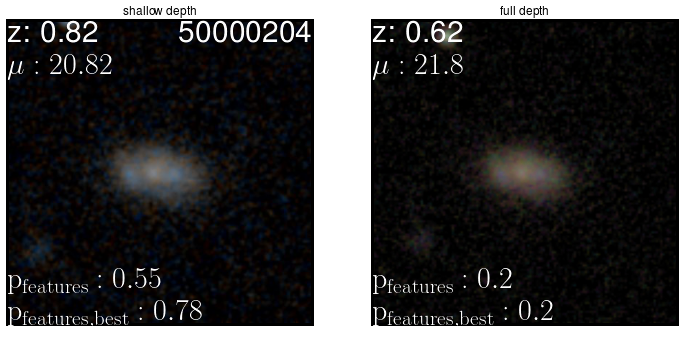

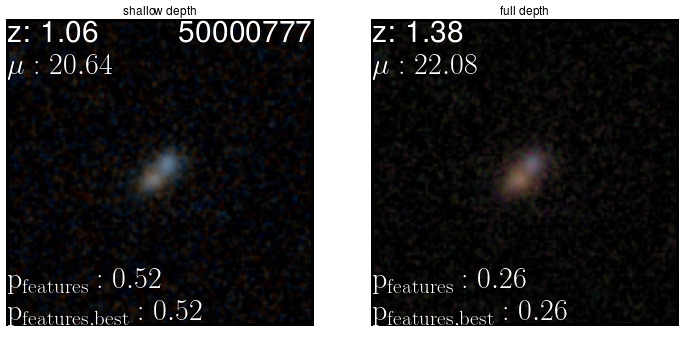

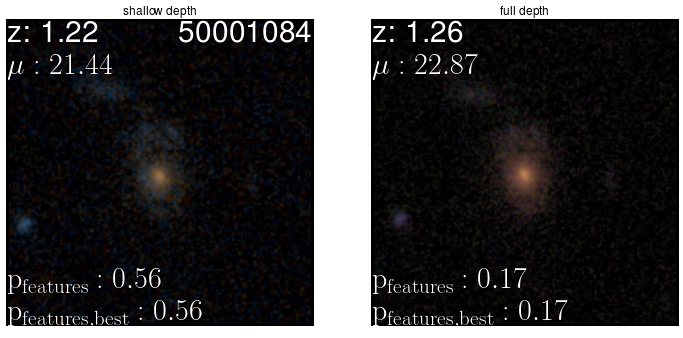

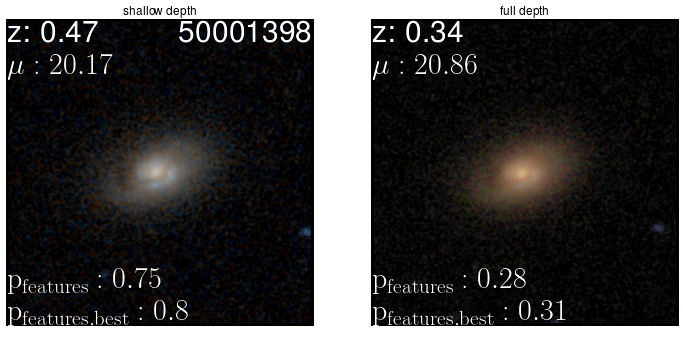

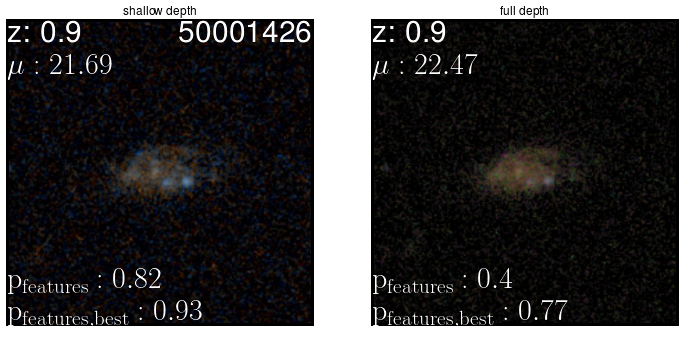

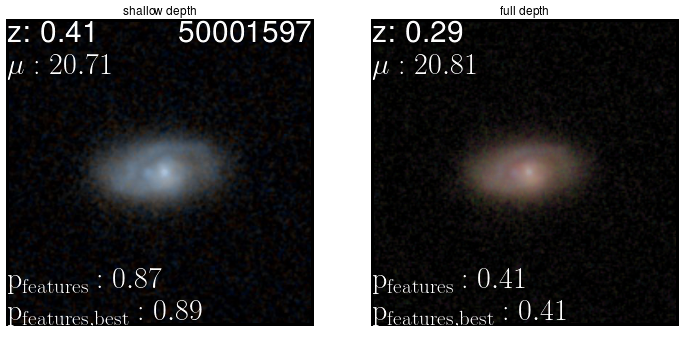

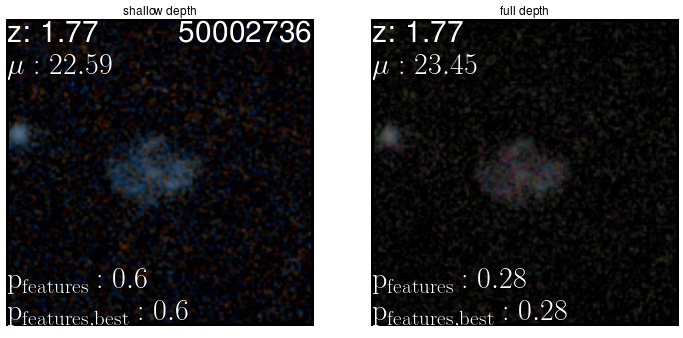

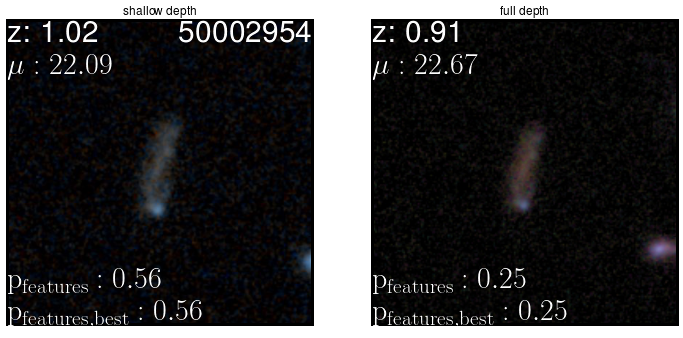

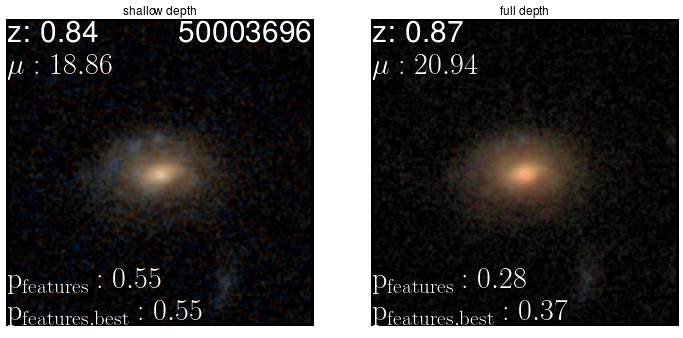

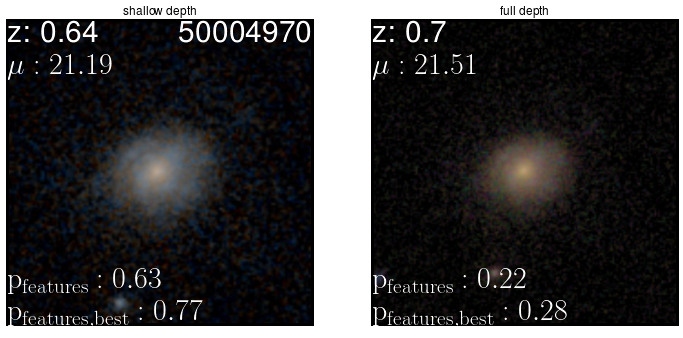

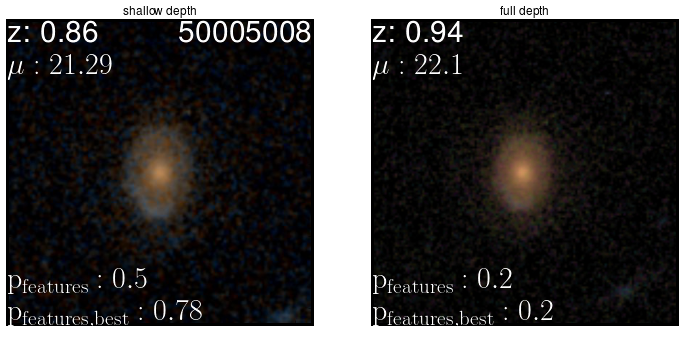

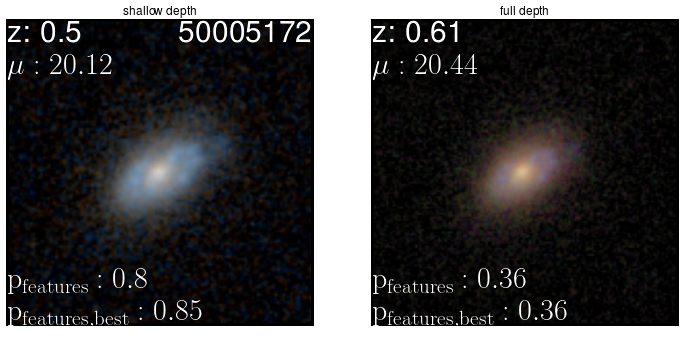

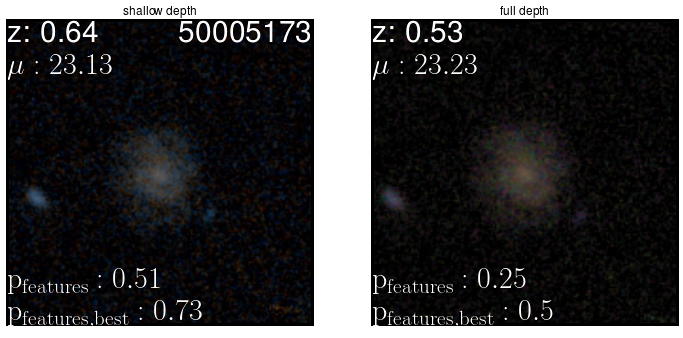

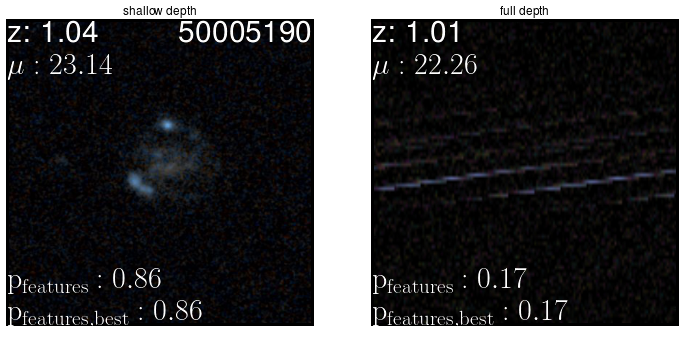

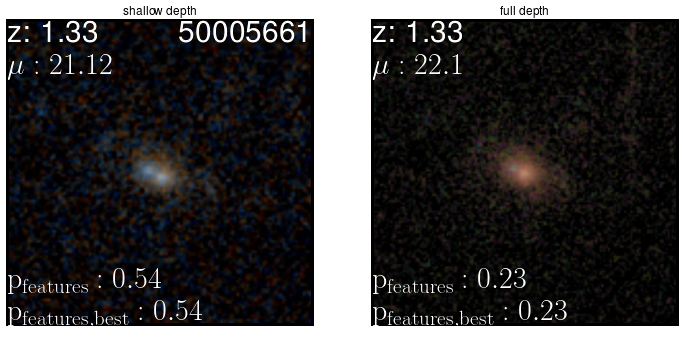

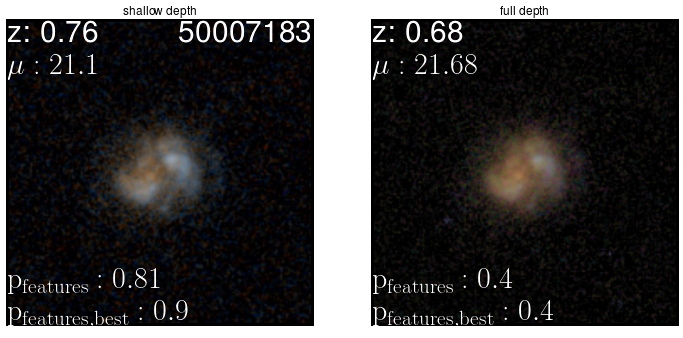

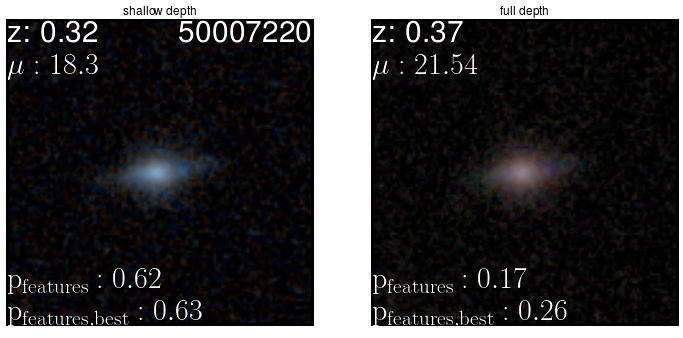

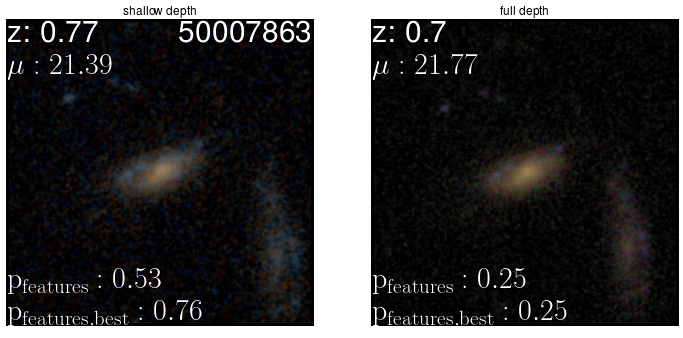

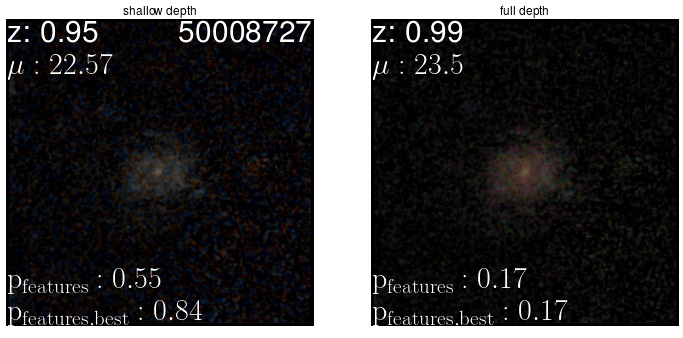

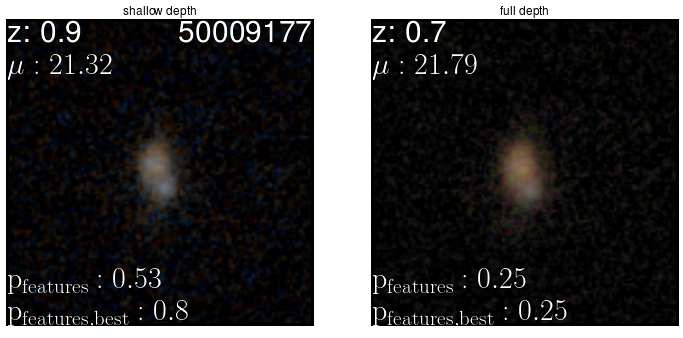

In [113]:
for i in range(0,20):
    compare_shallow_and_full_images(gdata[int(dff_list[i])])

In [77]:
def deltaf_over_f(p_shallow,p_full):
    df_f = (p_full-p_shallow)/p_shallow
    return df_f

In [80]:
deltaf_over_f(gdata[0][p_features_shallow_weighted],gdata[0][p_features_full_weighted])

0.14457832

In [111]:
dff_list=[]
for g,gal in enumerate(gdata):
    if gal[p_features_shallow_weighted]>.5:
        dff = deltaf_over_f(gal[p_features_shallow_weighted],gal[p_features_full_weighted])
        if dff < -.5:
            dff_list.append(g)

In [112]:
len(dff_list)

37